# Importing Libraries

In [183]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso, LinearRegression,Ridge,ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor
from sklearn.model_selection import cross_validate



# Gathering and Observing Data

In [184]:
# Load the dataset
dataset = pd.read_csv('Melbourne_housing_FULL.csv')
# Copy the original dataframe
dataset_orig = dataset.copy()

In [185]:
# Display first 5 columns
dataset.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [186]:
# Overview of the dataset
print(f'Shape               : {dataset.shape}\n'
      f'No. of columns      : {dataset.shape[1]}\n'
      f'Size                : {dataset.size}')

Shape               : (34857, 21)
No. of columns      : 21
Size                : 731997


In [187]:
# Information about dataset and columns
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

# Exploratory Data Analysis


In [188]:
# Descriptive statistics
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.0,3.031012e+00,0.969933,1.00000,2.00000,3.0000,4.000000e+00,1.600000e+01
Price,27247.0,1.050173e+06,641467.130105,85000.00000,635000.00000,870000.0000,1.295000e+06,1.120000e+07
Distance,34856.0,1.118493e+01,6.788892,0.00000,6.40000,10.3000,1.400000e+01,4.810000e+01
Postcode,34856.0,3.116063e+03,109.023903,3000.00000,3051.00000,3103.0000,3.156000e+03,3.978000e+03
Bedroom2,26640.0,3.084647e+00,0.980690,0.00000,2.00000,3.0000,4.000000e+00,3.000000e+01
Bathroom,26631.0,1.624798e+00,0.724212,0.00000,1.00000,2.0000,2.000000e+00,1.200000e+01
Car,26129.0,1.728845e+00,1.010771,0.00000,1.00000,2.0000,2.000000e+00,2.600000e+01
Landsize,23047.0,5.935990e+02,3398.841946,0.00000,224.00000,521.0000,6.700000e+02,4.330140e+05
BuildingArea,13742.0,1.602564e+02,401.267060,0.00000,102.00000,136.0000,1.880000e+02,4.451500e+04
YearBuilt,15551.0,1.965290e+03,37.328178,1196.00000,1940.00000,1970.0000,2.000000e+03,2.106000e+03


In [189]:
# Unique values per column
dataset.nunique()

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

## I. Adjusting Column Dtypes

In [190]:
# Change the dtype of 'Postcode' column to object
dataset['Postcode'] = dataset['Postcode'].astype('object')

In [191]:
# Convert 'Date' column to Unix Timestamp
dataset['Date_unix'] = pd.to_datetime(dataset['Date'],format='%d/%m/%Y').apply(lambda x: x.timestamp())
# Drop 'Date' column
dataset.drop('Date', axis = 1, inplace = True)

In [192]:
# Create 'Age' column
dataset['Age'] = 2023 - dataset['YearBuilt']
# Drop 'YearBuilt' column
dataset.drop('YearBuilt', axis = 1, inplace = True)

In [193]:
#Drop 'Address' column. 34K unique values.
dataset.drop('Address', axis = 1, inplace = True)

In [194]:
# Display adjusted Dtypes
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Rooms          34857 non-null  int64  
 2   Type           34857 non-null  object 
 3   Price          27247 non-null  float64
 4   Method         34857 non-null  object 
 5   SellerG        34857 non-null  object 
 6   Distance       34856 non-null  float64
 7   Postcode       34856 non-null  object 
 8   Bedroom2       26640 non-null  float64
 9   Bathroom       26631 non-null  float64
 10  Car            26129 non-null  float64
 11  Landsize       23047 non-null  float64
 12  BuildingArea   13742 non-null  float64
 13  CouncilArea    34854 non-null  object 
 14  Lattitude      26881 non-null  float64
 15  Longtitude     26881 non-null  float64
 16  Regionname     34854 non-null  object 
 17  Propertycount  34854 non-null  float64
 18  Date_u

## II. Duplicate Data

In [195]:
#Number of duplicated rows
dataset.duplicated().sum()

24

In [196]:
#Display duplicated rows
dataset[dataset.duplicated(keep = False)]

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Date_unix,Age
1191,Balwyn North,4,h,NaN,SP,Marshall,9.2,3104.0,NaN,NaN,NaN,NaN,NaN,Boroondara City Council,NaN,NaN,Southern Metropolitan,7809.0,1.464394e+09,NaN
1192,Balwyn North,4,h,NaN,SP,Marshall,9.2,3104.0,NaN,NaN,NaN,NaN,NaN,Boroondara City Council,NaN,NaN,Southern Metropolitan,7809.0,1.464394e+09,NaN
2584,Burwood,4,t,1000050.0,S,Philip,11.7,3125.0,NaN,NaN,NaN,NaN,NaN,Monash City Council,NaN,NaN,Southern Metropolitan,5678.0,1.466208e+09,NaN
2585,Burwood,4,t,1000050.0,S,Philip,11.7,3125.0,NaN,NaN,NaN,NaN,NaN,Monash City Council,NaN,NaN,Southern Metropolitan,5678.0,1.466208e+09,NaN
2743,Camberwell,4,h,NaN,S,Marshall,7.8,3124.0,NaN,NaN,NaN,NaN,NaN,Boroondara City Council,NaN,NaN,Southern Metropolitan,8920.0,1.463875e+09,NaN
2744,Camberwell,4,h,NaN,S,Marshall,7.8,3124.0,NaN,NaN,NaN,NaN,NaN,Boroondara City Council,NaN,NaN,Southern Metropolitan,8920.0,1.463875e+09,NaN
2745,Camberwell,4,h,NaN,S,Marshall,7.8,3124.0,NaN,NaN,NaN,NaN,NaN,Boroondara City Council,NaN,NaN,Southern Metropolitan,8920.0,1.463875e+09,NaN
6422,Malvern East,4,h,NaN,S,Jellis,11.2,3145.0,NaN,NaN,NaN,NaN,NaN,Stonnington City Council,NaN,NaN,Southern Metropolitan,8801.0,1.474070e+09,NaN
6423,Malvern East,4,h,NaN,S,Jellis,11.2,3145.0,NaN,NaN,NaN,NaN,NaN,Stonnington City Council,NaN,NaN,Southern Metropolitan,8801.0,1.474070e+09,NaN
6604,Maribyrnong,2,u,NaN,W,hockingstuart,8.7,3032.0,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,4918.0,1.463875e+09,NaN


In [197]:
#Drop duplicated rows
dataset.drop_duplicates(inplace = True)

### Room number from 2 different sources ('Rooms' and 'Bedroom2)

In [198]:
#Number of NaN values in 'Rooms' column
dataset['Rooms'].isna().sum()

0

In [199]:
#Number of NaN values in 'Bedroom2' column.
dataset['Bedroom2'].isna().sum()

8194

In [200]:
#Total number of rows
dataset.shape[0]

34833

In [201]:
# Absolute difference of 2 values
dataset['diff'] = (dataset['Rooms'] - dataset['Bedroom2']).abs()

In [202]:
# Differences between 2 columns, 'Rooms' and 'Bedroom2'
diff_over_0 = dataset[dataset['diff'] > 0].shape[0]
diff_over_1 = dataset[dataset['diff'] > 1].shape[0]
diff_over_2 = dataset[dataset['diff'] > 2].shape[0]


print(f"Difference over 0: {diff_over_0}\nDifference over 1: {diff_over_1}\nDifference over 2: {diff_over_2}")

Difference over 0: 948
Difference over 1: 131
Difference over 2: 31


>Since more than 25% of the values in 'Bedroom2' NaN and difference between 'Bedroom2' and 'Rooms' is insignificantly small, 'Bedroom2' will be dropped from the dataset to prevent duplicated data.  

In [203]:
# Drop columns
dataset.drop(['Bedroom2','diff'], axis = 1, inplace = True)

## III. Outliers

In [204]:
# Dataset overview
dataset.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 34833 entries, 0 to 34856
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34833 non-null  object 
 1   Rooms          34833 non-null  int64  
 2   Type           34833 non-null  object 
 3   Price          27237 non-null  float64
 4   Method         34833 non-null  object 
 5   SellerG        34833 non-null  object 
 6   Distance       34832 non-null  float64
 7   Postcode       34832 non-null  object 
 8   Bathroom       26630 non-null  float64
 9   Car            26128 non-null  float64
 10  Landsize       23046 non-null  float64
 11  BuildingArea   13741 non-null  float64
 12  CouncilArea    34830 non-null  object 
 13  Lattitude      26880 non-null  float64
 14  Longtitude     26880 non-null  float64
 15  Regionname     34830 non-null  object 
 16  Propertycount  34830 non-null  float64
 17  Date_unix      34833 non-null  float64
 18  Age   

In [205]:
# Create a list for numerical columns
num_cols = dataset.select_dtypes(include=['float64','int64']).columns.tolist()
num_cols

['Rooms',
 'Price',
 'Distance',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'Lattitude',
 'Longtitude',
 'Propertycount',
 'Date_unix',
 'Age']

In [206]:
# Create a copy of the dataset
dataset_c = dataset.copy()

In [207]:
# Calculate z_scores of the numerical columns
for col in num_cols:
    curr = zscore(dataset_c[col], axis = 0, nan_policy= 'omit',)
    dataset_c[col+'_z'] = curr

In [208]:
# Display the numbers of values whose z_score is not between -3 and +3
for col in num_cols:
    print(f"{col} : {dataset_c[(dataset_c[col+'_z'] > 3) | (dataset_c[col+'_z'] < -3)].shape[0]}")

Rooms : 269
Price : 474
Distance : 791
Bathroom : 371
Car : 353
Landsize : 43
BuildingArea : 9
Lattitude : 324
Longtitude : 315
Propertycount : 844
Date_unix : 0
Age : 9


In [209]:
# Determine initial mean and standard deviation of the numerical columns.
# Assign the values to a dictionary to prevent them from changing after compressing the outliers to limit values.
init_means = {}
for col in num_cols:
   init_means[col] = dataset[col].mean()

init_stds = {}
for col in num_cols:
  init_stds[col] = dataset[col].std()

In [210]:
# Function to calculate +3 and -3 sigma values per columns and to assign outlier values to upper and lower limits.
def replace_with_limit(df,col):
    upper_limit = init_means[col] + 3 * init_stds[col]
    lower_limit = init_means[col] - 3 * init_stds[col]
    df.loc[(df[col] < lower_limit),col] = lower_limit
    df.loc[(df[col] > upper_limit),col] = upper_limit
    return lower_limit,upper_limit

In [211]:
# Iterate the defined function over numerical columns.
for col in num_cols:
    lower_limit,upper_limit = replace_with_limit(dataset,col)
    print(f"{col} : {dataset[(dataset[col] > upper_limit) | (dataset[col] < lower_limit)].shape[0]}")

Rooms : 0
Price : 0
Distance : 0
Bathroom : 0
Car : 0
Landsize : 0
BuildingArea : 0
Lattitude : 0
Longtitude : 0
Propertycount : 0
Date_unix : 0
Age : 0


## IV.Missing Values

In [212]:
# Total number of NaN values
dataset.isna().sum()

Suburb               0
Rooms                0
Type                 0
Price             7596
Method               0
SellerG              0
Distance             1
Postcode             1
Bathroom          8203
Car               8705
Landsize         11787
BuildingArea     21092
CouncilArea          3
Lattitude         7953
Longtitude        7953
Regionname           3
Propertycount        3
Date_unix            0
Age              19283
dtype: int64

In [213]:
# Drop the rows those 'Price' column is NaN.
# Since it is the target variable, it affects model's accuracy to fill it with fillna method.
dataset.dropna(subset = 'Price',inplace = True)

In [214]:
# Assign categorical columns to a list.
cat_cols = dataset.select_dtypes(include='object').columns.tolist()
cat_cols

['Suburb',
 'Type',
 'Method',
 'SellerG',
 'Postcode',
 'CouncilArea',
 'Regionname']

In [215]:
# Fill NaN values in categorical columns with .mode() method.
for col in cat_cols:
    dataset[col] = dataset[col].fillna(dataset[col].mode().iloc[0])

In [216]:
# Fill NaN values in numerical columns with .mean() method.
for col in num_cols:
    dataset[col] = dataset[col].fillna(dataset[col].mean())

In [217]:
# Dataset description after pre-processing.
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,27237.0,2.988669e+00,9.361569e-01,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,5.940946e+00
Price,27237.0,1.034692e+06,5.669698e+05,8.500000e+04,6.350000e+05,8.700000e+05,1.295000e+06,2.974903e+06
Distance,27237.0,1.117917e+01,6.404049e+00,0.000000e+00,6.400000e+00,1.050000e+01,1.400000e+01,3.154579e+01
Postcode,27237.0,3.113796e+03,1.111517e+02,3.000000e+03,3.046000e+03,3.088000e+03,3.153000e+03,3.978000e+03
Bathroom,27237.0,1.585084e+00,5.871026e-01,0.000000e+00,1.000000e+00,1.585084e+00,2.000000e+00,3.797276e+00
Car,27237.0,1.700091e+00,8.002478e-01,0.000000e+00,1.000000e+00,1.700091e+00,2.000000e+00,4.761201e+00
Landsize,27237.0,5.283204e+02,5.759930e+02,0.000000e+00,3.510000e+02,5.283204e+02,5.920000e+02,1.079035e+04
BuildingArea,27237.0,1.514357e+02,5.698369e+01,0.000000e+00,1.514357e+02,1.514357e+02,1.514357e+02,1.364095e+03
Lattitude,27237.0,-3.780658e+01,7.842512e-02,-3.808148e+01,-3.784290e+01,-3.780658e+01,-3.776600e+01,-3.753979e+01
Longtitude,27237.0,1.449972e+02,1.039168e-01,1.446413e+02,1.449542e+02,1.449972e+02,1.450484e+02,1.453623e+02


## Data Visualization

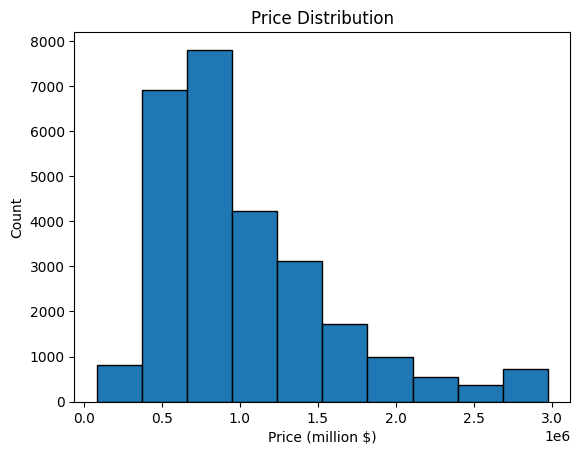

In [218]:
# Visualize price distribution.
plt.hist(dataset['Price'], edgecolor='black')
plt.autoscale()
plt.xlabel('Price (million $)')
plt.ylabel('Count')
plt.title('Price Distribution')
plt.show()

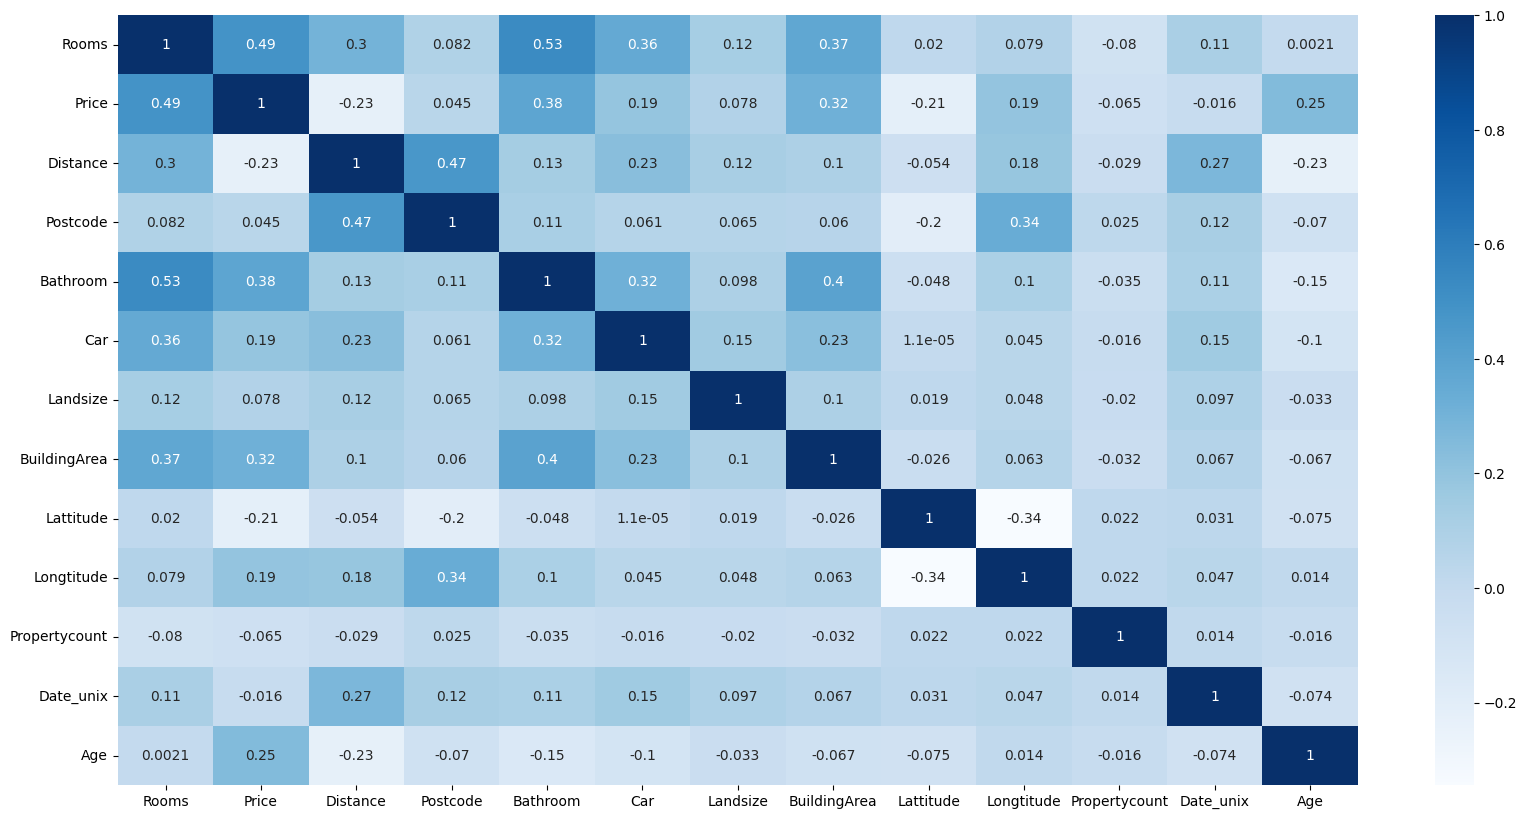

In [219]:
# Correlation matrix
corr = dataset.corr(numeric_only = True)
plt.figure(figsize=(20,10))
sns.heatmap(corr, cmap="Blues", annot=True);

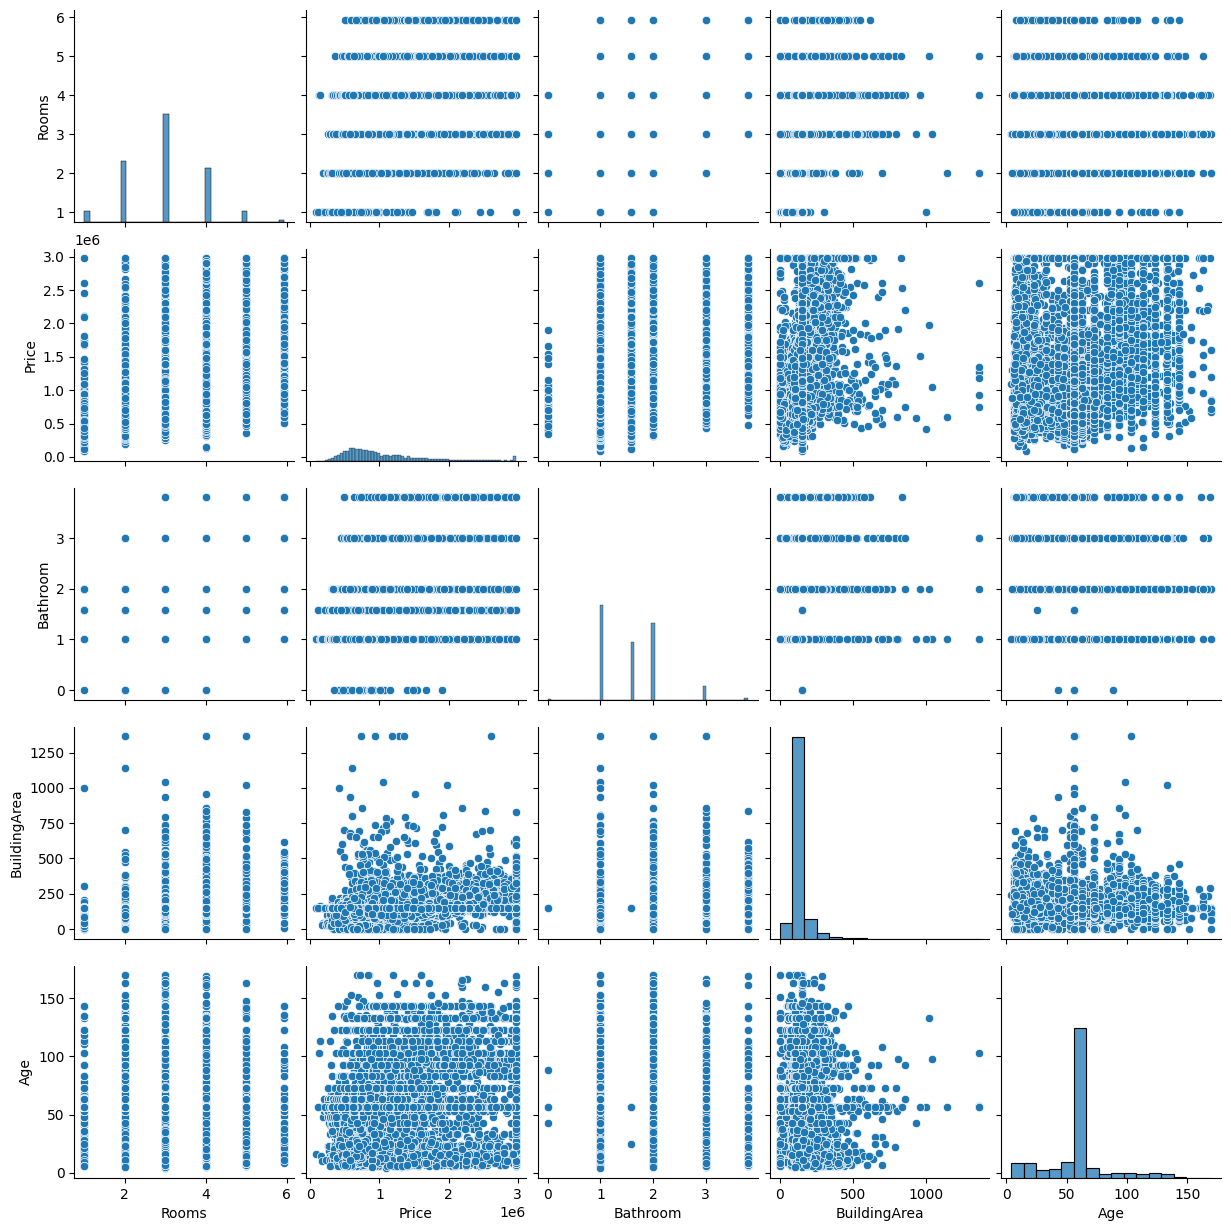

In [220]:
# Draw a pairplot of the columns whose correlation coefficient with 'Price' is over 0.25
sns.pairplot(dataset, vars = [col for col in num_cols if dataset[col].corr(dataset['Price']) > 0.25] )
plt.show()

## Encoding Categorical Variables

In [221]:
# Encode categorical columns using LabelEncoder
encoder = LabelEncoder()
for col in cat_cols:
    dataset[col] = encoder.fit_transform(dataset[col])

# Model Selection

In [222]:
# Partition the dataset by independent values and target value.
y = dataset["Price"]
X = dataset.drop("Price", axis=1)

In [223]:
# Models to use on dataset to predict 'Price'.
models = {
'Lasso': {
'model': Lasso()
},
'LinearRegression': {
'model': LinearRegression()
},
'Ridge': {
'model': Ridge()
},
'ElasticNet': {
'model': ElasticNet()
},
'KNeighborsRegressor': {
'model': KNeighborsRegressor()
},
'RandomForestRegressor': {
'model': RandomForestRegressor()
},
'GradientBoostingRegressor': {
'model': GradientBoostingRegressor()
},
'AdaBoostRegressor': {
'model': AdaBoostRegressor(n_estimators = 5, learning_rate = 1.2, loss = 'exponential', random_state = 2)
}}

# Model Evaluation

In [225]:
# Cross validate every model with scorings MAE, MSE, RMSE and R2.
for name, dic in models.items():
    for k,model in dic.items():
        cv_results = cross_validate(model, X, y, cv=5, scoring=['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error', 'r2'])
        print(f'########## {name} ##########')
        print(f'MAE: {round(cv_results["test_neg_mean_absolute_error"].mean(),2)}')
        print(f'MSE: {round(cv_results["test_neg_mean_squared_error"].mean(),2)}')
        print(f'RMSE: {round(cv_results["test_neg_root_mean_squared_error"].mean(),2)}')
        print(f'R2: {round(cv_results["test_r2"].mean(),2)}')

########## Lasso ##########
MAE: -253277.04
MSE: -118788608859.95
RMSE: -344224.8
R2: 0.62
########## LinearRegression ##########
MAE: -253277.59
MSE: -118788595770.16
RMSE: -344224.79
R2: 0.62
########## Ridge ##########
MAE: -253264.1
MSE: -118785874639.8
RMSE: -344220.89
R2: 0.62
########## ElasticNet ##########
MAE: -262331.1
MSE: -133631835083.21
RMSE: -364835.22
R2: 0.58
########## KNeighborsRegressor ##########
MAE: -453032.44
MSE: -357601762748.93
RMSE: -596741.64
R2: -0.13
########## RandomForestRegressor ##########
MAE: -165779.55
MSE: -61820559860.82
RMSE: -247495.83
R2: 0.81
########## GradientBoostingRegressor ##########
MAE: -178264.24
MSE: -69697822491.88
RMSE: -263411.64
R2: 0.78
########## AdaBoostRegressor ##########
MAE: -267454.0
MSE: -125432223139.33
RMSE: -353718.81
R2: 0.6


# *Best performing model is Random Forest, with a R2 value of 0.81.*